In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
train=pd.read_csv("D:\\DataSet\\AdvanceHousePrice\\train.csv")
test=pd.read_csv("D:\\DataSet\\AdvanceHousePrice\\test.csv")

In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


<AxesSubplot:>

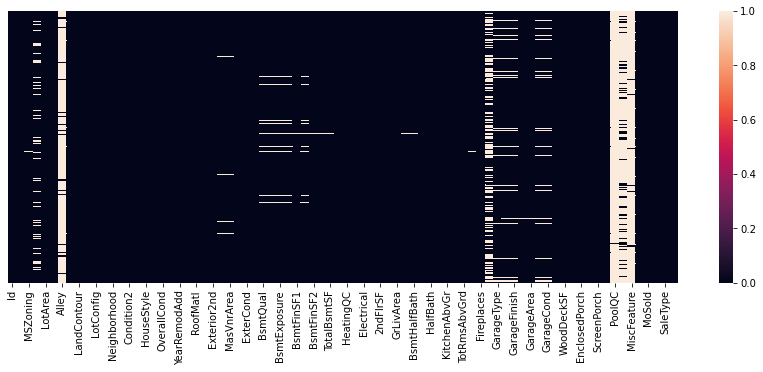

In [4]:
#find all the features that has null value
plt.figure(figsize=(15,5))
sns.heatmap(test.isnull(),cmap="rocket",yticklabels=False)

In [5]:
train.shape

(1460, 81)

In [6]:
#find those missing column
na_feature=train.loc[:,train.isnull().any()]
#find % of that column has null value
for feature in na_feature:
    print(feature,round(train[feature].isnull().mean(),4),"% of missing value")

LotFrontage 0.1774 % of missing value
Alley 0.9377 % of missing value
MasVnrType 0.0055 % of missing value
MasVnrArea 0.0055 % of missing value
BsmtQual 0.0253 % of missing value
BsmtCond 0.0253 % of missing value
BsmtExposure 0.026 % of missing value
BsmtFinType1 0.0253 % of missing value
BsmtFinType2 0.026 % of missing value
Electrical 0.0007 % of missing value
FireplaceQu 0.4726 % of missing value
GarageType 0.0555 % of missing value
GarageYrBlt 0.0555 % of missing value
GarageFinish 0.0555 % of missing value
GarageQual 0.0555 % of missing value
GarageCond 0.0555 % of missing value
PoolQC 0.9952 % of missing value
Fence 0.8075 % of missing value
MiscFeature 0.963 % of missing value


In [7]:
train["Alley"].isnull().mean()

0.9376712328767123

In [8]:
np.where(train["Alley"].isnull(),1,0)

array([1, 1, 1, ..., 1, 1, 1])

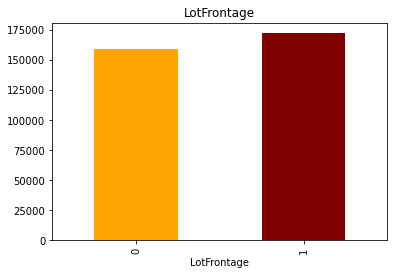

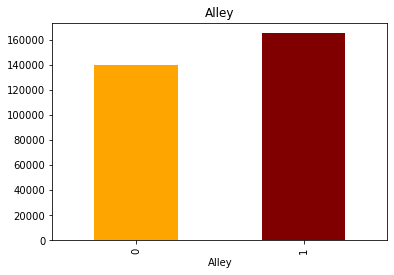

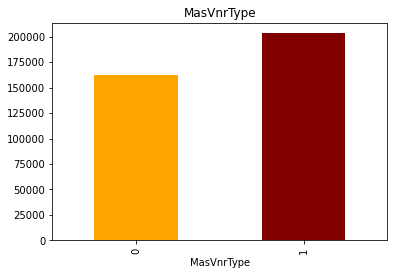

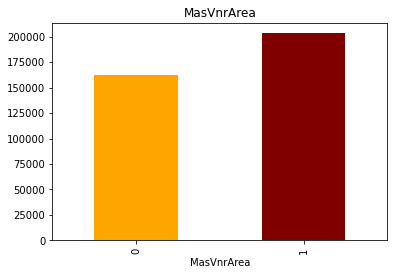

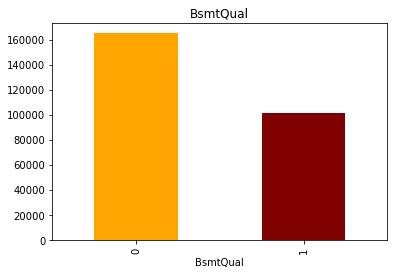

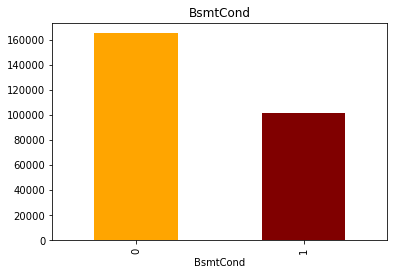

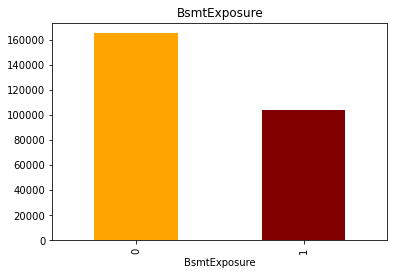

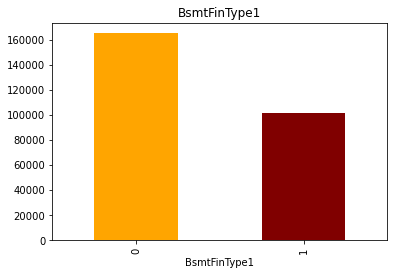

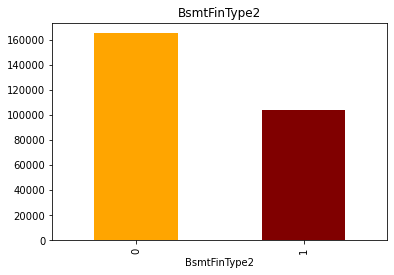

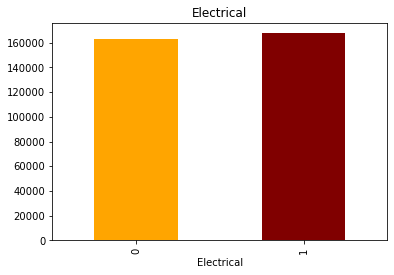

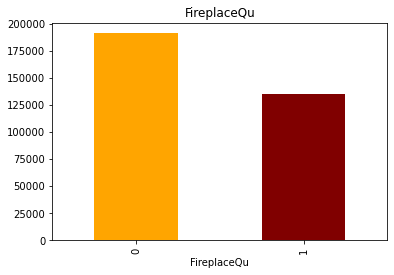

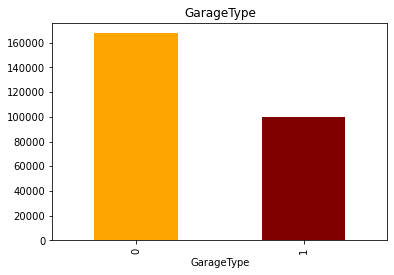

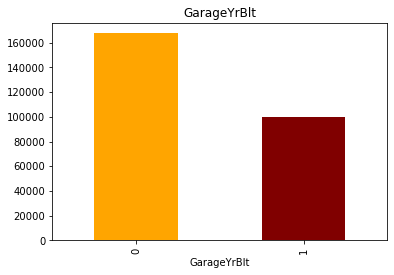

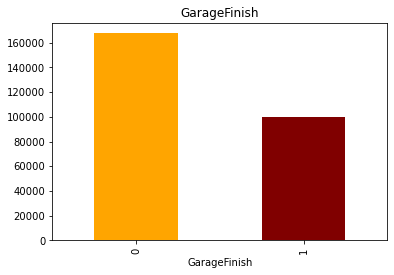

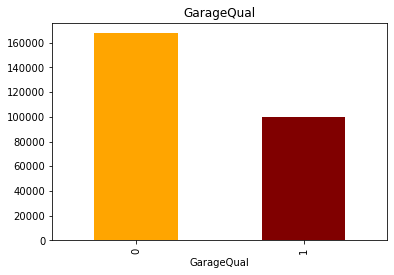

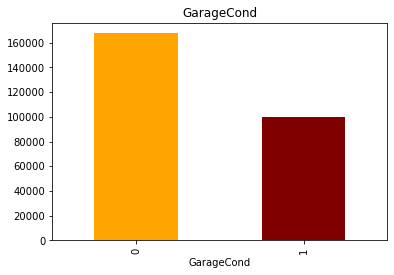

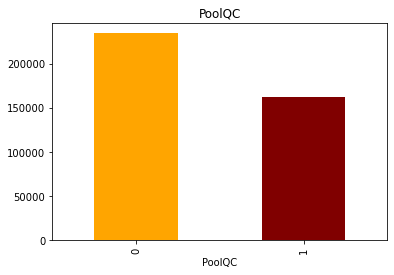

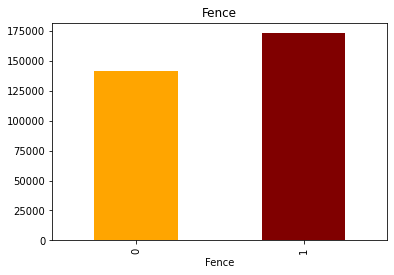

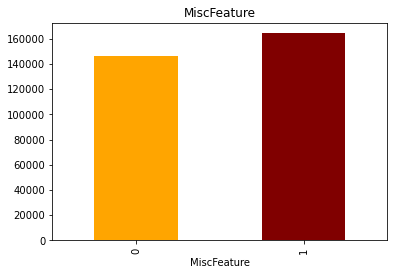

In [9]:
%matplotlib inline
for feature in na_feature:
    data=train.copy()
    data[feature]=np.where(data[feature].isnull(),1,0)
    data.groupby(feature)["SalePrice"].median().plot.bar(color=["orange","maroon"])
    plt.title(feature)
    plt.show()

 Here we can see that there is an important relation between missing value and the sales price.So we have to perform some feature engineering so that we can replace the null values with something meaningfull

In [10]:
#find those column whose datatype is note Object in short numarical data
numarical_data=[feature for feature in train
    if train[feature].dtype !="O"]

In [11]:
year_date=[feature for feature in numarical_data
    if "YEAR" in feature.upper() or "YR" in feature.upper()]

Text(0.5, 1.0, 'Average Price of House by Year')

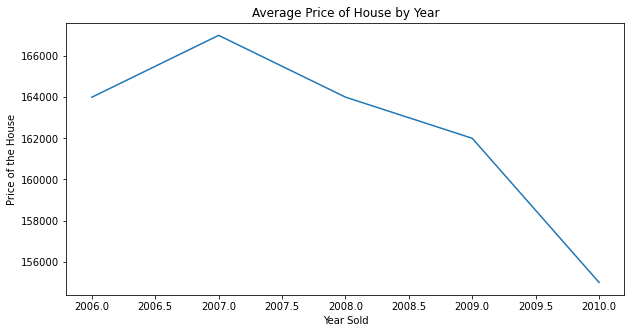

In [12]:
plt.figure(figsize=(10,5))
train.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel("Year Sold")
plt.ylabel("Price of the House")
plt.title("Average Price of House by Year")

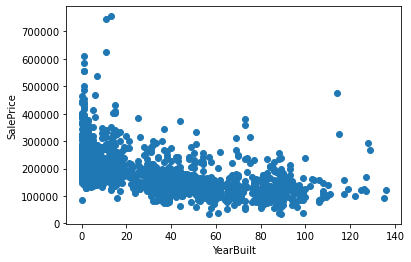

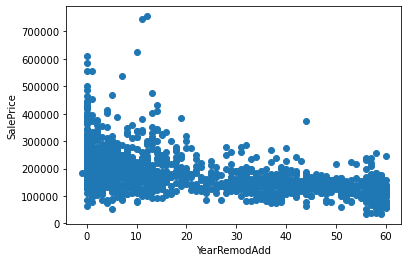

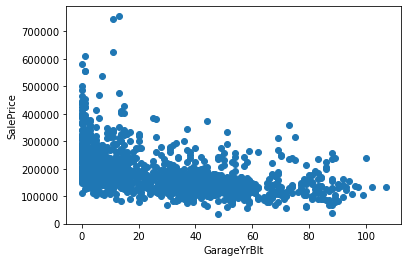

In [19]:
for feature in year_date:
    data=train.copy()
    if feature != "YrSold":
        data[feature]=train["YrSold"]-data[feature]
        plt.scatter(data[feature],data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

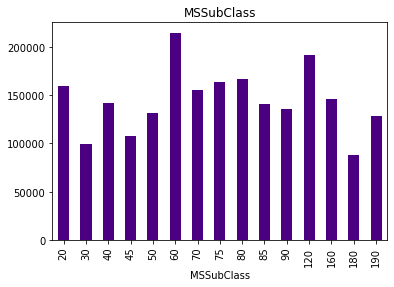

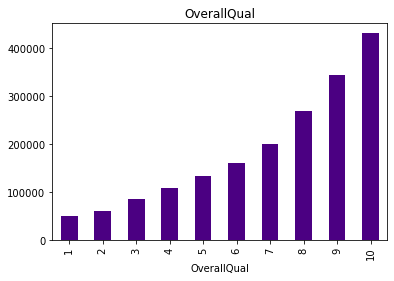

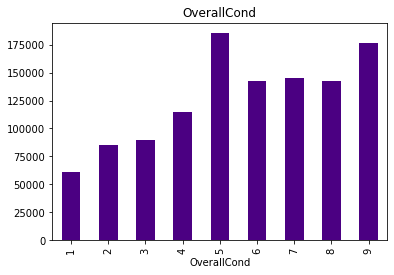

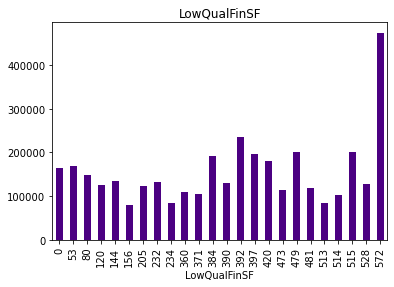

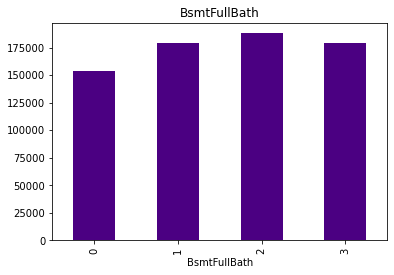

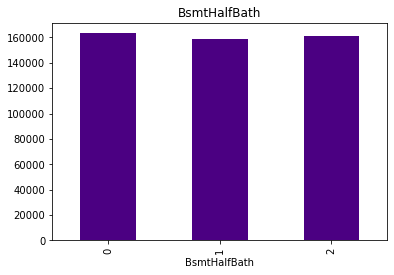

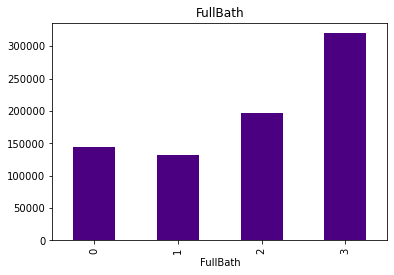

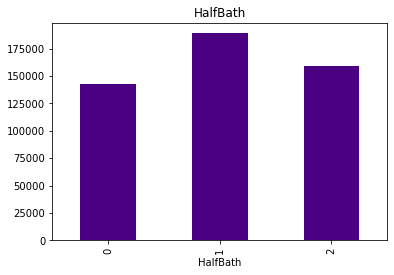

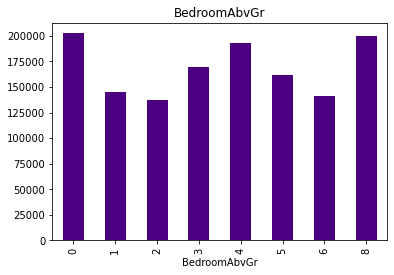

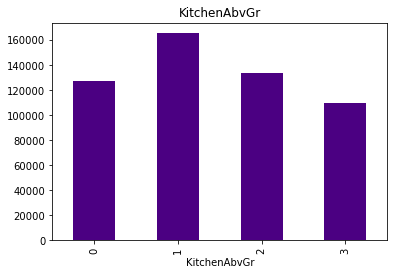

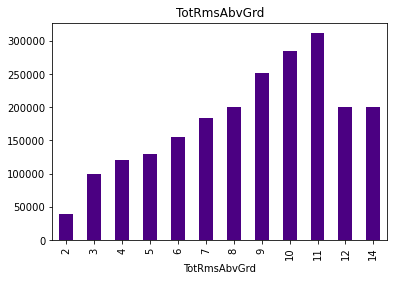

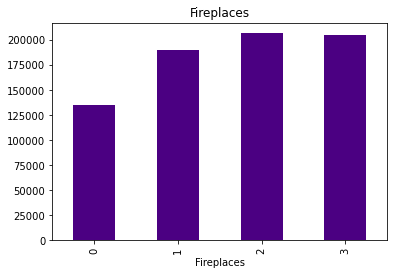

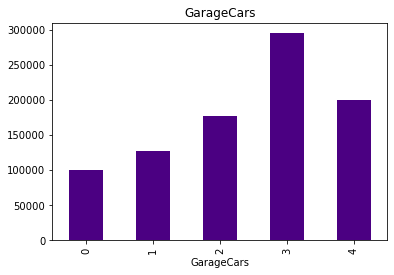

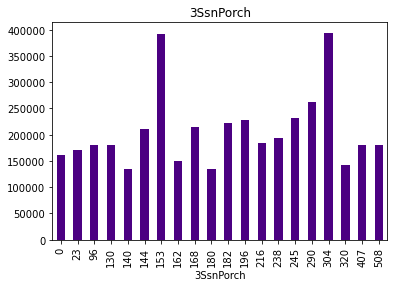

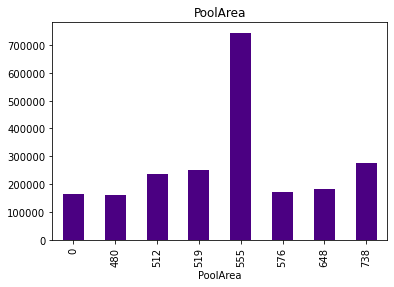

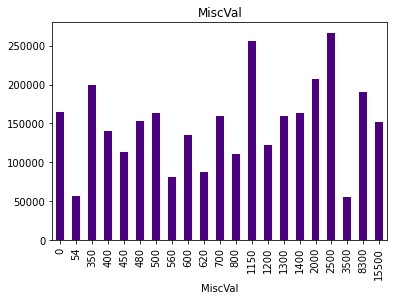

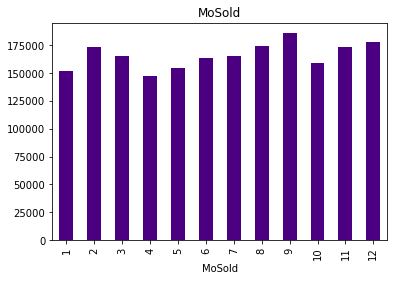

In [20]:
train_dis=[feature for feature in numarical_data if feature not in year_date and len(train[feature].unique())<25]
for feature in train_dis:
    data=train.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar(color="indigo")
    plt.title(feature)
    plt.show()

In [21]:
train_con=[feature for feature in numarical_data if feature not in year_date 
           and feature !="Id" and feature not in train_dis]

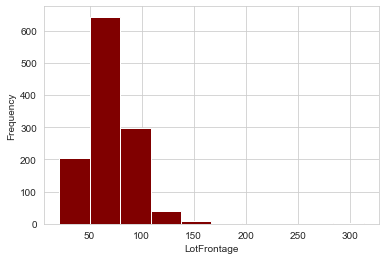

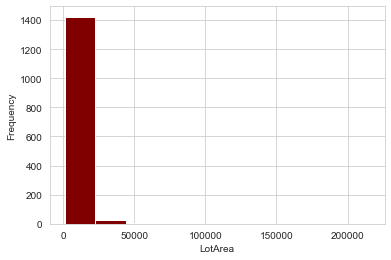

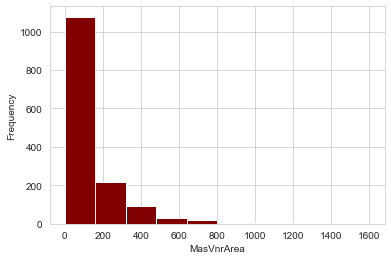

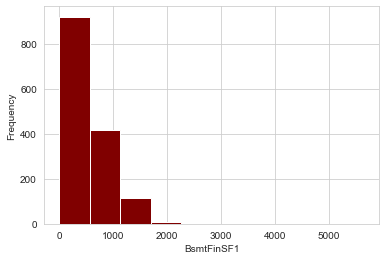

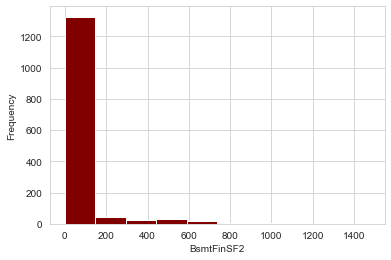

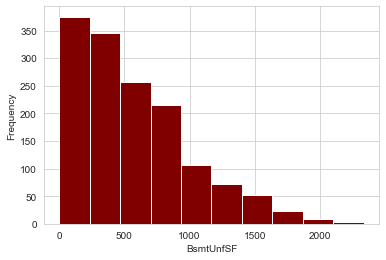

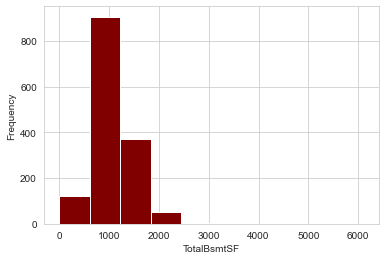

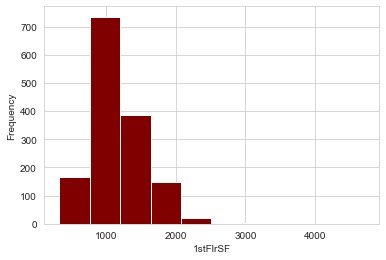

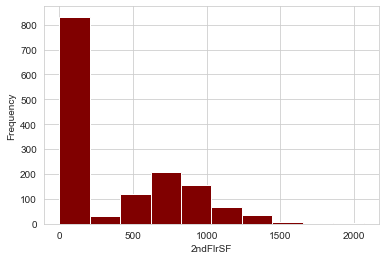

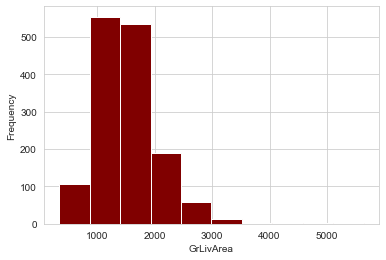

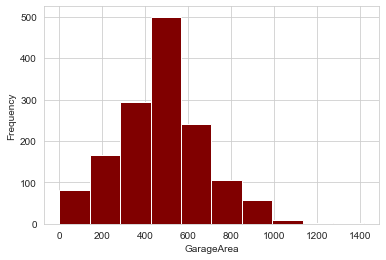

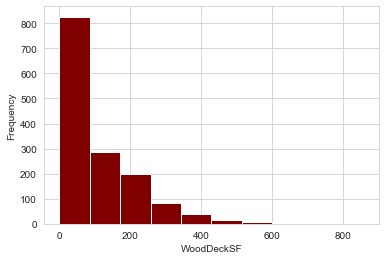

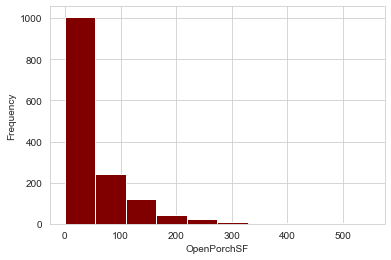

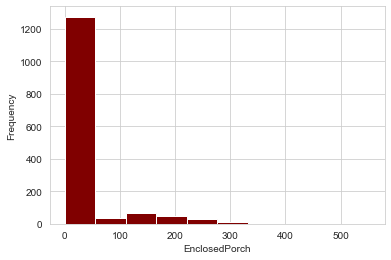

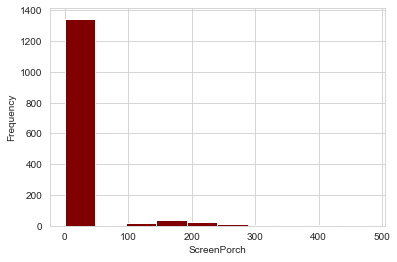

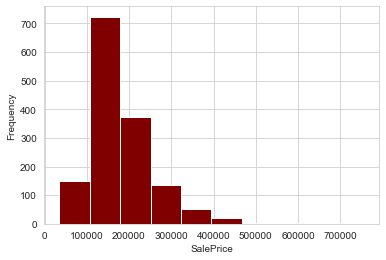

In [22]:
for feature in train_con:
    data=train.copy()
    sns.set_style("whitegrid")
    data[feature].plot.hist(color="maroon")
    plt.xlabel(feature)
    plt.show()

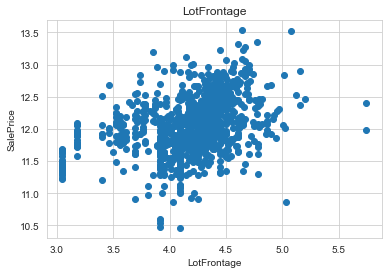

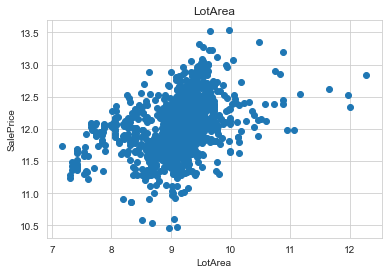

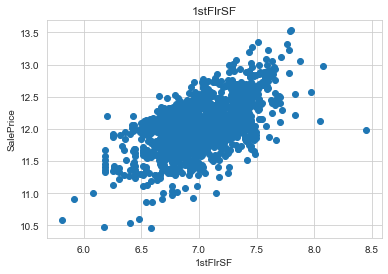

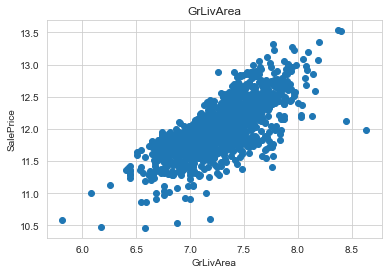

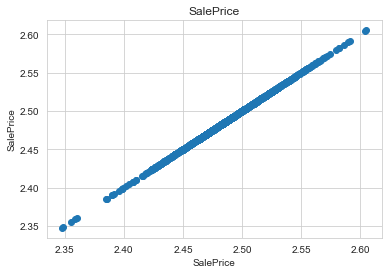

In [34]:
for feature in train_con:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data["SalePrice"]=np.log(data["SalePrice"])
        plt.scatter(data[feature],data["SalePrice"])
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()
        

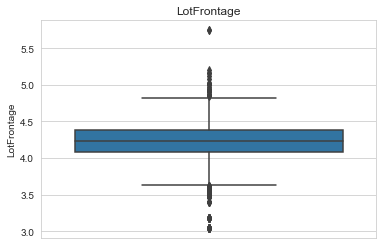

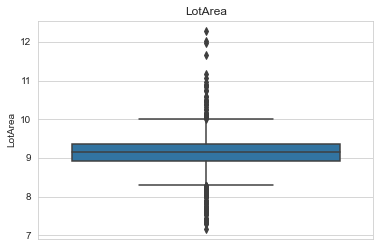

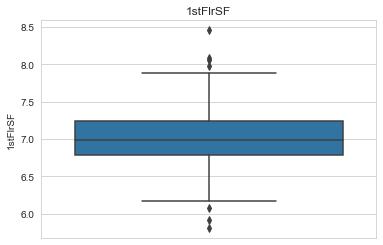

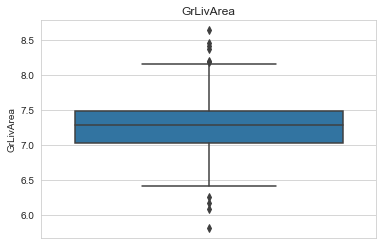

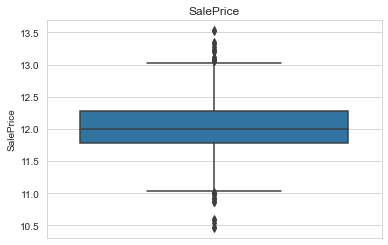

In [44]:
for feature in train_con:
    data=train.copy()
#you can use np.log1p(data) that will take care of 0s if it exists
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.title(feature)
        sns.boxplot(y=data[feature])
        plt.show()

In [49]:
category=[feature for feature in train.columns if train[feature].dtype=="O"]

In [53]:
for feature in category:
    print("The feature {} has {} category".format(feature,len(train[feature].unique())))

The feature MSZoning has 5 category
The feature Street has 2 category
The feature Alley has 3 category
The feature LotShape has 4 category
The feature LandContour has 4 category
The feature Utilities has 2 category
The feature LotConfig has 5 category
The feature LandSlope has 3 category
The feature Neighborhood has 25 category
The feature Condition1 has 9 category
The feature Condition2 has 8 category
The feature BldgType has 5 category
The feature HouseStyle has 8 category
The feature RoofStyle has 6 category
The feature RoofMatl has 8 category
The feature Exterior1st has 15 category
The feature Exterior2nd has 16 category
The feature MasVnrType has 5 category
The feature ExterQual has 4 category
The feature ExterCond has 5 category
The feature Foundation has 6 category
The feature BsmtQual has 5 category
The feature BsmtCond has 5 category
The feature BsmtExposure has 5 category
The feature BsmtFinType1 has 7 category
The feature BsmtFinType2 has 7 category
The feature Heating has 6

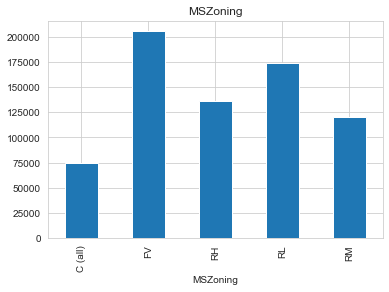

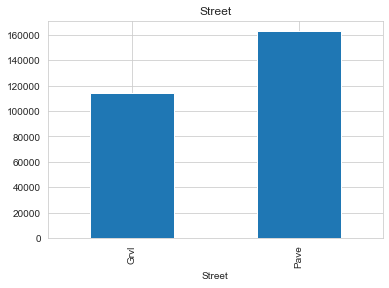

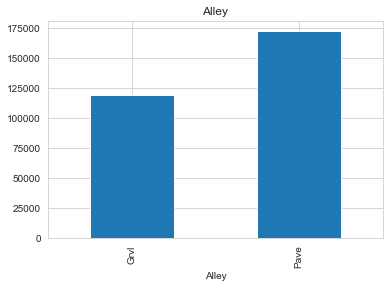

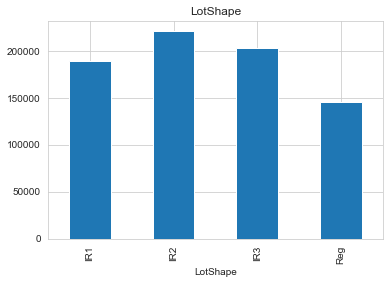

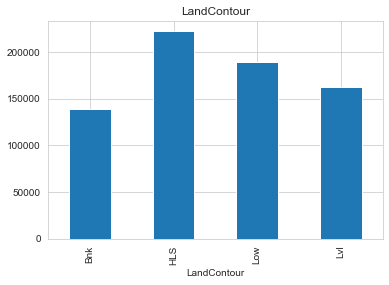

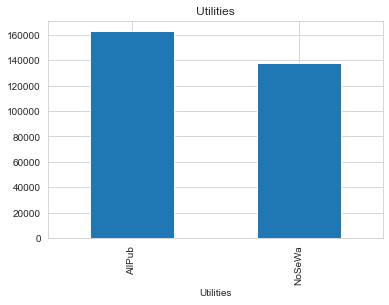

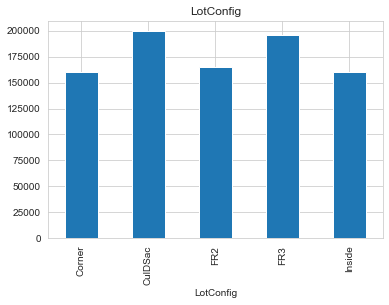

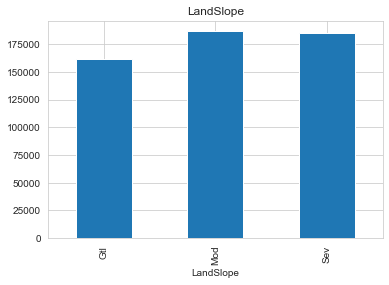

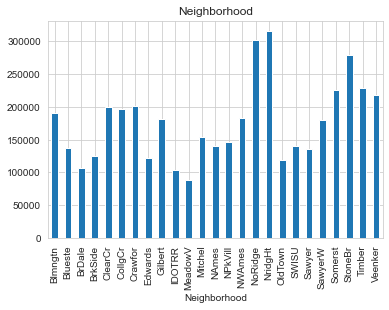

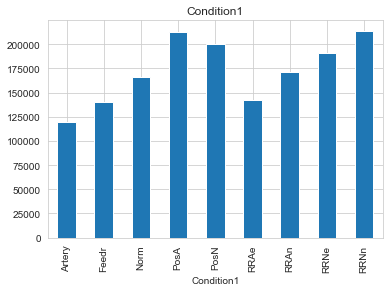

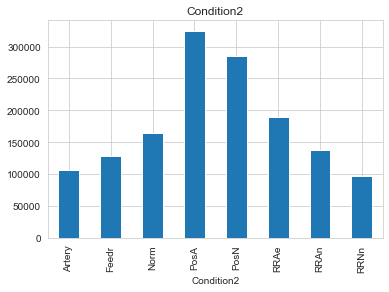

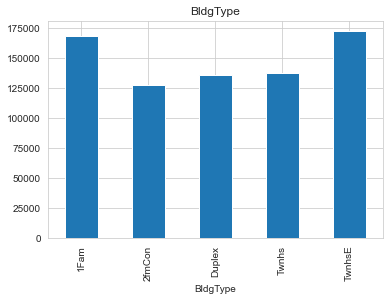

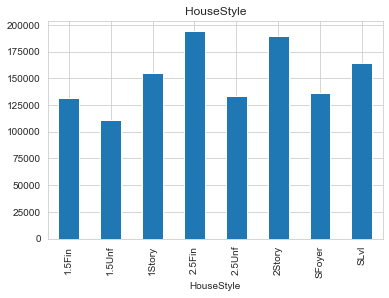

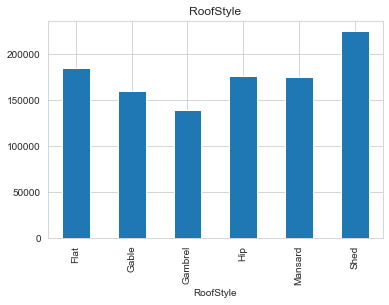

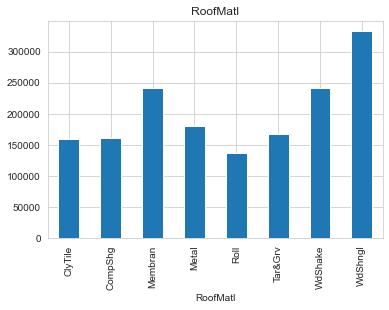

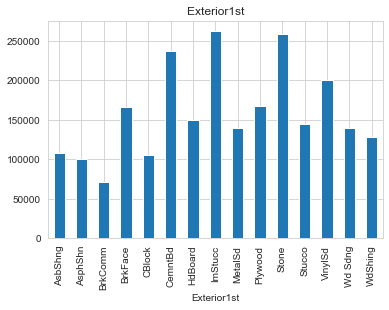

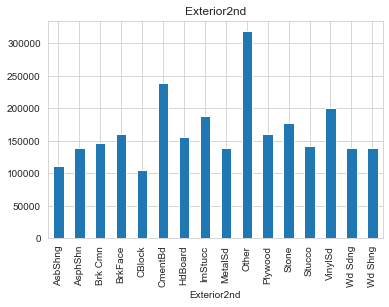

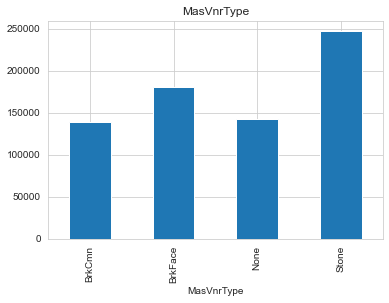

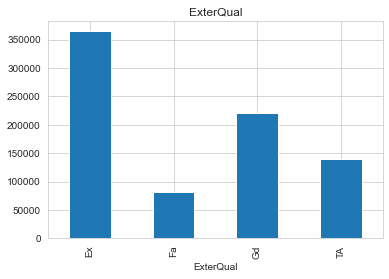

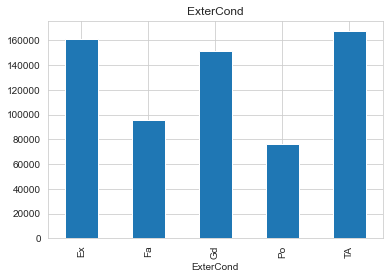

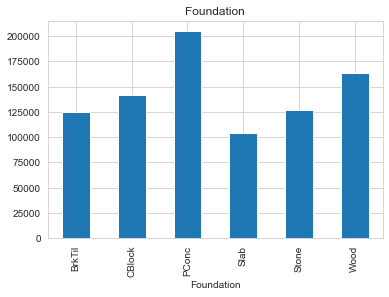

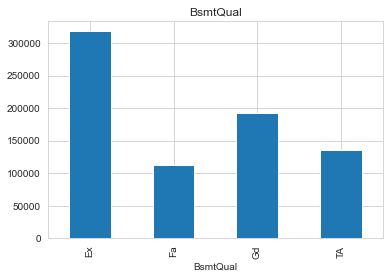

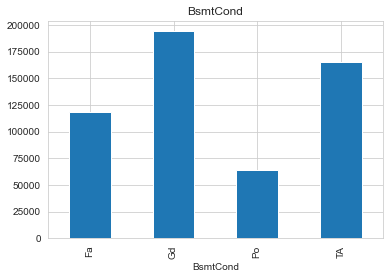

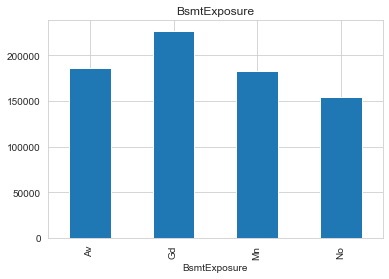

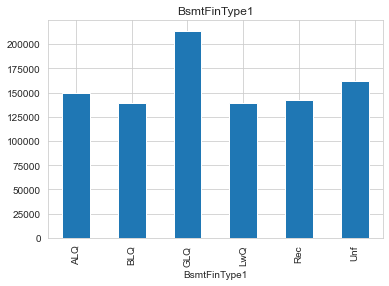

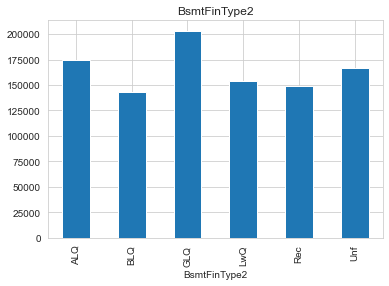

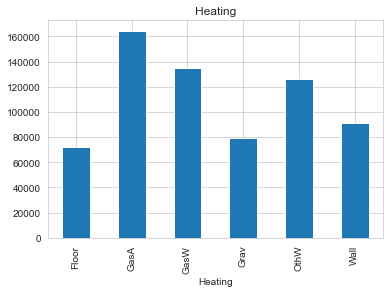

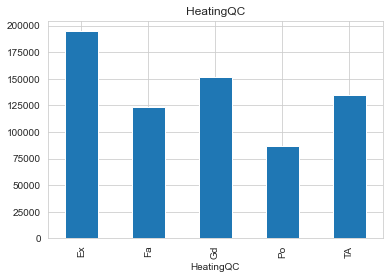

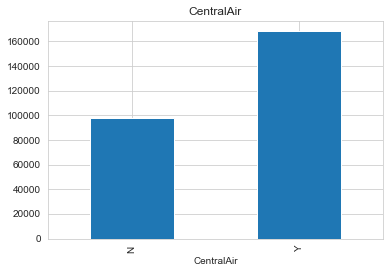

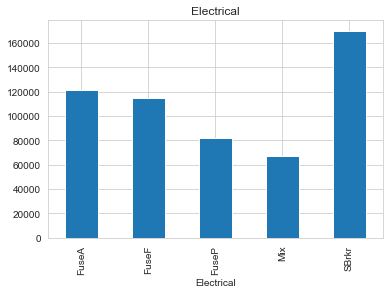

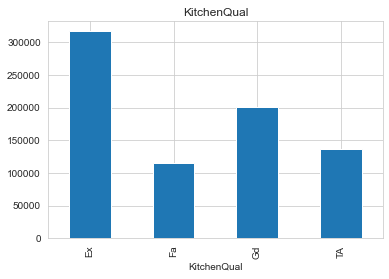

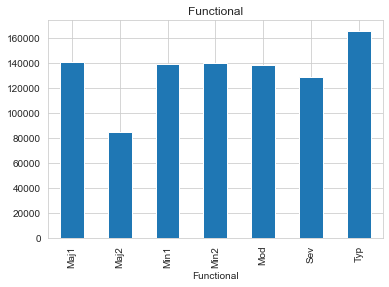

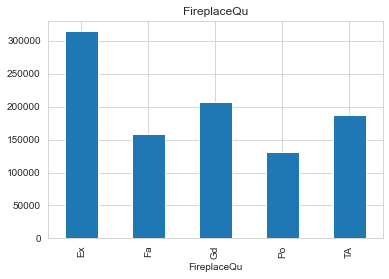

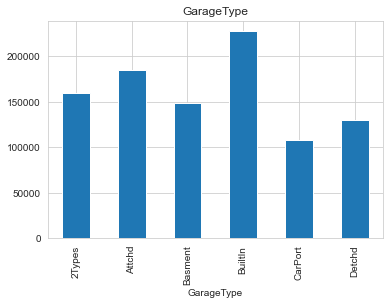

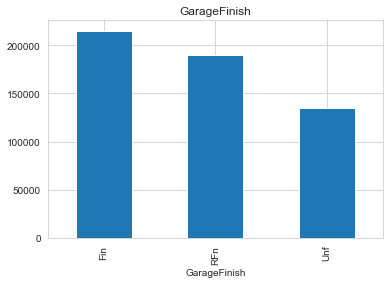

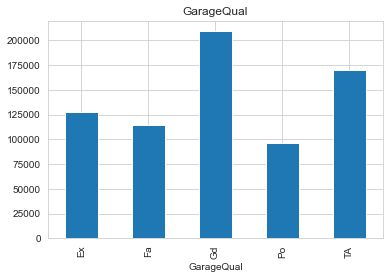

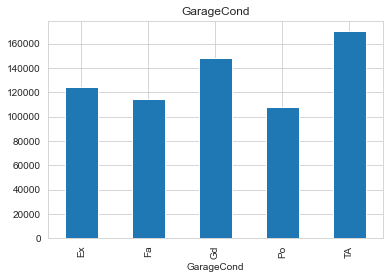

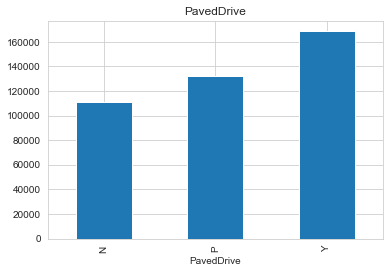

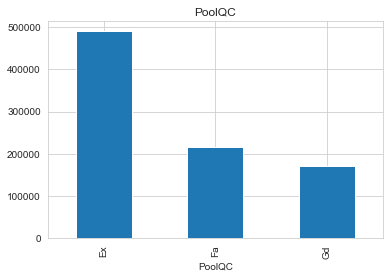

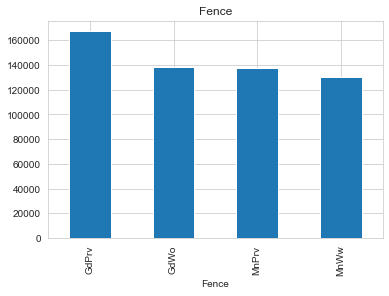

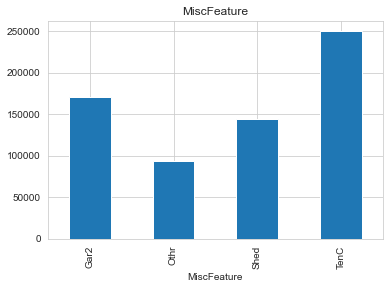

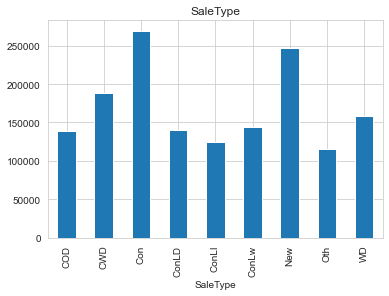

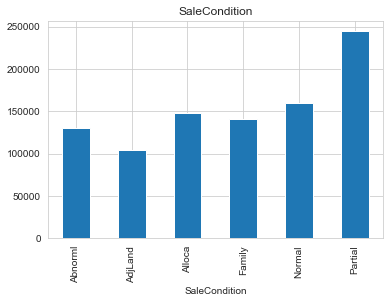

In [57]:
for feature in category:
    data=train.copy()
    plt.title(feature)
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.show()